# **Happy House Problem**

Simply the problem is about detection, which we should detect if the person is smiling or not. As we only allow a person to enter the house if he is smiling!

#### **Table of Contents :**
- [Uploading data](#uploading)
- [Cleaning data](#clean)
- [Building a model](#model)
- [Optimizers](#optimizer)
- [Conclusion](#conc)


<a id='uploading'></a>
### 1. Uploading the data



Details of the dataset :
*   Images are of shape (64,64,3)
*   Training: 600 pictures
*   Test: 150 pictures!


\begin{equation}
  y =\begin{cases}
    0, & \text{In case if (not happy)}.\\
    1, & \text{if (happy)}.
  \end{cases}
\end{equation}



In [29]:
#We used h5py library to read our data because it in H5 file "data file saved in the Hierarchical Data Format (HDF)" 
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [30]:
path_to_train = "../input/happy-house-dataset/train_happy.h5"
path_to_test = "../input/happy-house-dataset/test_happy.h5"

train_dataset = h5py.File(path_to_train)
x_train = np.array(train_dataset['train_set_x'])
y_train = np.array(train_dataset['train_set_y'], ndmin=2)

test_dataset = h5py.File(path_to_test)
x_test = np.array(test_dataset['test_set_x'])
y_test = np.array(test_dataset['test_set_y'], ndmin=2)

print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (1, 600)
X_test shape: (150, 64, 64, 3)
Y_test shape: (1, 150)


### 2. Cleaning
<a id='clean'></a>


In [31]:
# Normalizing the pixel values between 0 and 1 
# where pixel values original range were between 0 and 255 so we divided by 255
x_train = x_train/255
x_test = x_test/255

In [32]:
# Reshape
y_train = y_train.T #(600,1)
y_test = y_test.T #(150,1)

Image shape : (64, 64, 3)
The person is happy '1' or not happy '0' : [1]


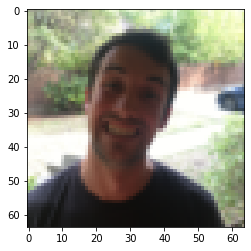

In [33]:
# Sample from dataset
print("Image shape :",x_train[5].shape)
print("The person is happy '1' or not happy '0' :", y_train[5])
imshow(x_train[5])

 ### 3. Building a model
 <a id='model'></a>


In [34]:
from tensorflow import keras
from keras.models import Sequential
from keras import regularizers,optimizers
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

In [35]:
model = keras.Sequential()

model.add(Conv2D(32, kernel_size=(7,7), input_shape=(64,64,3),padding ='same',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3), padding ='same',activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(120,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),activation = 'relu'))
model.add(Dense(1,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)              

In [37]:
initial_model = model
initial_model.compile(loss ='binary_crossentropy',metrics =['accuracy'])

In [38]:
model_history= initial_model.fit(x_train, y_train, epochs=8, batch_size=50, validation_split=0.1)

Epoch 1/8
11/11 [==============================] - 2s 126ms/step - loss: 1.3861 - accuracy: 0.4981 - val_loss: 0.7983 - val_accuracy: 0.7667
Epoch 2/8
11/11 [==============================] - 1s 103ms/step - loss: 0.7892 - accuracy: 0.5630 - val_loss: 0.7693 - val_accuracy: 0.5167
Epoch 3/8
11/11 [==============================] - 1s 104ms/step - loss: 0.7306 - accuracy: 0.6389 - val_loss: 0.7751 - val_accuracy: 0.5167
Epoch 4/8
11/11 [==============================] - 1s 103ms/step - loss: 0.7148 - accuracy: 0.6704 - val_loss: 0.6985 - val_accuracy: 0.5667
Epoch 5/8
11/11 [==============================] - 1s 103ms/step - loss: 0.6706 - accuracy: 0.6704 - val_loss: 0.6398 - val_accuracy: 0.6333
Epoch 6/8
11/11 [==============================] - 1s 102ms/step - loss: 0.7137 - accuracy: 0.6907 - val_loss: 0.6667 - val_accuracy: 0.7333
Epoch 7/8
11/11 [==============================] - 1s 103ms/step - loss: 0.5498 - accuracy: 0.7704 - val_loss: 0.5478 - val_accuracy: 0.7000
Epoch 8/8
11/

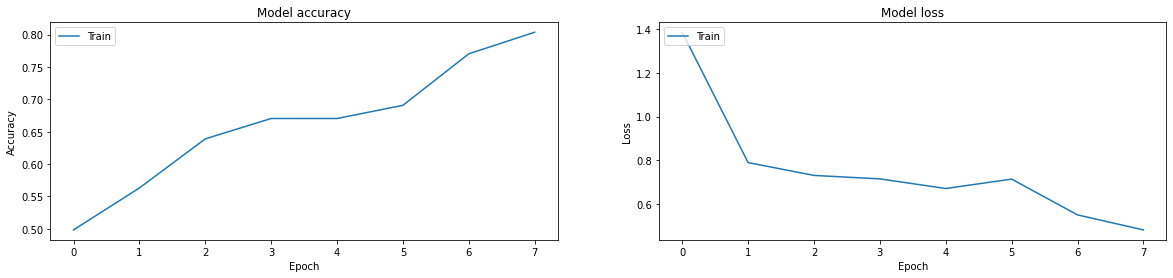

In [39]:
fig = plt.figure(figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')
plt.show()

In [40]:
evaluation = initial_model.evaluate(x_test, y_test)
print ("\nTest Accuracy = " + str(evaluation[1]))
print ("Loss = " + str(evaluation[0]))

5/5 [==============================] - 0s 18ms/step - loss: 0.5414 - accuracy: 0.7533

Test Accuracy = 0.753333330154419
Loss = 0.5414393544197083


### 4. Optimizers
 <a id='optimizer'></a>

#### 4.1.  Gradient Descent with Momentum (SGD)

In [41]:
SGD_model = model
SGD_model.compile(loss ='binary_crossentropy',metrics =['accuracy'],optimizer='SGD')

In [42]:
model_history = SGD_model.fit(x_train, y_train, epochs=8, batch_size=50, validation_split=0.1)

Epoch 1/8
11/11 [==============================] - 2s 131ms/step - loss: 0.4357 - accuracy: 0.8426 - val_loss: 0.3484 - val_accuracy: 0.8833
Epoch 2/8
11/11 [==============================] - 1s 99ms/step - loss: 0.3358 - accuracy: 0.8889 - val_loss: 0.3091 - val_accuracy: 0.9167
Epoch 3/8
11/11 [==============================] - 1s 99ms/step - loss: 0.3174 - accuracy: 0.8944 - val_loss: 0.2926 - val_accuracy: 0.9167
Epoch 4/8
11/11 [==============================] - 1s 99ms/step - loss: 0.3062 - accuracy: 0.8963 - val_loss: 0.2808 - val_accuracy: 0.9167
Epoch 5/8
11/11 [==============================] - 1s 100ms/step - loss: 0.2939 - accuracy: 0.9056 - val_loss: 0.2684 - val_accuracy: 0.9167
Epoch 6/8
11/11 [==============================] - 1s 100ms/step - loss: 0.2939 - accuracy: 0.9019 - val_loss: 0.2658 - val_accuracy: 0.9167
Epoch 7/8
11/11 [==============================] - 1s 103ms/step - loss: 0.2906 - accuracy: 0.9074 - val_loss: 0.2605 - val_accuracy: 0.9167
Epoch 8/8
11/11 

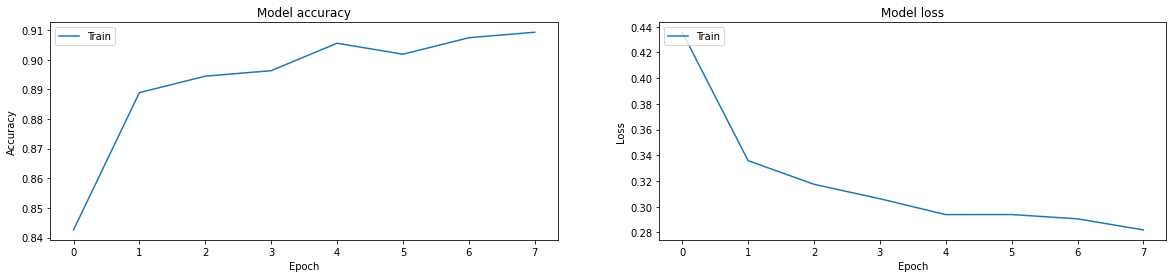

In [43]:
fig = plt.figure(figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')
plt.show()

In [44]:
evaluation = SGD_model.evaluate(x_test, y_test)
print ("\nTest Accuracy = " + str(evaluation[1]))
print ("Loss = " + str(evaluation[0]))

5/5 [==============================] - 0s 19ms/step - loss: 0.4226 - accuracy: 0.8267

Test Accuracy = 0.8266666531562805
Loss = 0.42260274291038513


#### 4.2. Root Mean Square Propagation (RMSProp)

In [45]:
RMSProp_model = model
RMSProp_model.compile(loss ='binary_crossentropy',metrics =['accuracy'],optimizer='RMSProp')

In [46]:
model_history = RMSProp_model.fit(x_train, y_train, epochs=8, batch_size=50, validation_split=0.1)

Epoch 1/8
11/11 [==============================] - 2s 131ms/step - loss: 1.0464 - accuracy: 0.7944 - val_loss: 0.3118 - val_accuracy: 0.9333
Epoch 2/8
11/11 [==============================] - 1s 102ms/step - loss: 0.3574 - accuracy: 0.8648 - val_loss: 0.2891 - val_accuracy: 0.9333
Epoch 3/8
11/11 [==============================] - 1s 101ms/step - loss: 0.3244 - accuracy: 0.8889 - val_loss: 0.3661 - val_accuracy: 0.8667
Epoch 4/8
11/11 [==============================] - 1s 103ms/step - loss: 0.3403 - accuracy: 0.8685 - val_loss: 0.4200 - val_accuracy: 0.8500
Epoch 5/8
11/11 [==============================] - 1s 102ms/step - loss: 0.3025 - accuracy: 0.8981 - val_loss: 0.2162 - val_accuracy: 0.9500
Epoch 6/8
11/11 [==============================] - 1s 101ms/step - loss: 0.3093 - accuracy: 0.8981 - val_loss: 0.3437 - val_accuracy: 0.8667
Epoch 7/8
11/11 [==============================] - 2s 161ms/step - loss: 0.3506 - accuracy: 0.8667 - val_loss: 0.2073 - val_accuracy: 0.9500
Epoch 8/8
11/

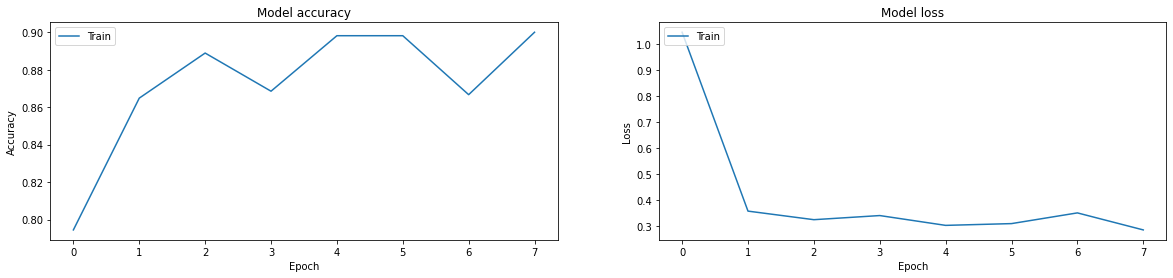

In [47]:
fig = plt.figure(figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')
plt.show()

In [48]:
evaluation = RMSProp_model.evaluate(x_test, y_test)
print ("\nTest Accuracy = " + str(evaluation[1]))
print ("Loss = " + str(evaluation[0]))

5/5 [==============================] - 0s 18ms/step - loss: 0.3275 - accuracy: 0.8867

Test Accuracy = 0.8866666555404663
Loss = 0.327472984790802


#### 4.3. Adaptive Moment Estimation (ADAM) 

In [49]:
Adam_model = model
Adam_model.compile(loss ='binary_crossentropy',metrics =['accuracy'],optimizer='Adam')

In [50]:
model_history = Adam_model.fit(x_train, y_train, epochs=8, batch_size=50, validation_split=0.1)

Epoch 1/8
11/11 [==============================] - 2s 129ms/step - loss: 0.2357 - accuracy: 0.9352 - val_loss: 0.2031 - val_accuracy: 0.9500
Epoch 2/8
11/11 [==============================] - 1s 100ms/step - loss: 0.2036 - accuracy: 0.9407 - val_loss: 0.1703 - val_accuracy: 0.9667
Epoch 3/8
11/11 [==============================] - 1s 101ms/step - loss: 0.1656 - accuracy: 0.9500 - val_loss: 0.1360 - val_accuracy: 0.9833
Epoch 4/8
11/11 [==============================] - 1s 101ms/step - loss: 0.1496 - accuracy: 0.9630 - val_loss: 0.1277 - val_accuracy: 0.9667
Epoch 5/8
11/11 [==============================] - 1s 101ms/step - loss: 0.1279 - accuracy: 0.9741 - val_loss: 0.1232 - val_accuracy: 0.9667
Epoch 6/8
11/11 [==============================] - 1s 101ms/step - loss: 0.1250 - accuracy: 0.9741 - val_loss: 0.1204 - val_accuracy: 0.9500
Epoch 7/8
11/11 [==============================] - 1s 99ms/step - loss: 0.1278 - accuracy: 0.9704 - val_loss: 0.1097 - val_accuracy: 0.9667
Epoch 8/8
11/1

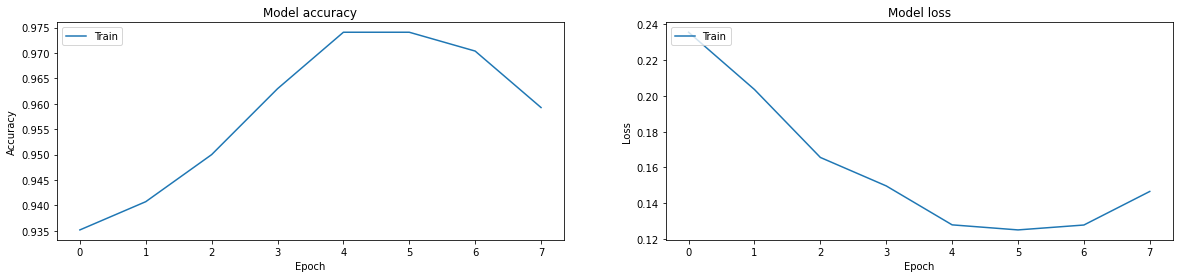

In [51]:
fig = plt.figure(figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')
plt.show()

In [52]:
evaluation = Adam_model.evaluate(x_test, y_test)
print ("\nTest Accuracy = " + str(evaluation[1]))
print ("Loss = " + str(evaluation[0]))

5/5 [==============================] - 0s 20ms/step - loss: 0.2397 - accuracy: 0.9133

Test Accuracy = 0.9133333563804626
Loss = 0.2397271692752838


> In Conclusion : 
Adam got the highest accuracy. So, it is the best optimizer in our case.

In [53]:
Final = model
Final.compile(loss ='binary_crossentropy',metrics =['accuracy'],optimizer='Adam')

In [57]:
model_history = Final.fit(x_train, y_train, epochs=60, batch_size=150, validation_split=0.1)

Epoch 1/60
4/4 [==============================] - 1s 257ms/step - loss: 0.0619 - accuracy: 0.9926 - val_loss: 0.1012 - val_accuracy: 0.9667
Epoch 2/60
4/4 [==============================] - 1s 362ms/step - loss: 0.0620 - accuracy: 0.9944 - val_loss: 0.0845 - val_accuracy: 0.9833
Epoch 3/60
4/4 [==============================] - 1s 250ms/step - loss: 0.0602 - accuracy: 0.9926 - val_loss: 0.1160 - val_accuracy: 0.9667
Epoch 4/60
4/4 [==============================] - 1s 244ms/step - loss: 0.0656 - accuracy: 0.9963 - val_loss: 0.0838 - val_accuracy: 0.9833
Epoch 5/60
4/4 [==============================] - 1s 244ms/step - loss: 0.0598 - accuracy: 0.9944 - val_loss: 0.0964 - val_accuracy: 0.9833
Epoch 6/60
4/4 [==============================] - 1s 247ms/step - loss: 0.0538 - accuracy: 0.9963 - val_loss: 0.1091 - val_accuracy: 0.9667
Epoch 7/60
4/4 [==============================] - 1s 245ms/step - loss: 0.0535 - accuracy: 0.9963 - val_loss: 0.0936 - val_accuracy: 0.9833
Epoch 8/60
4/4 [====

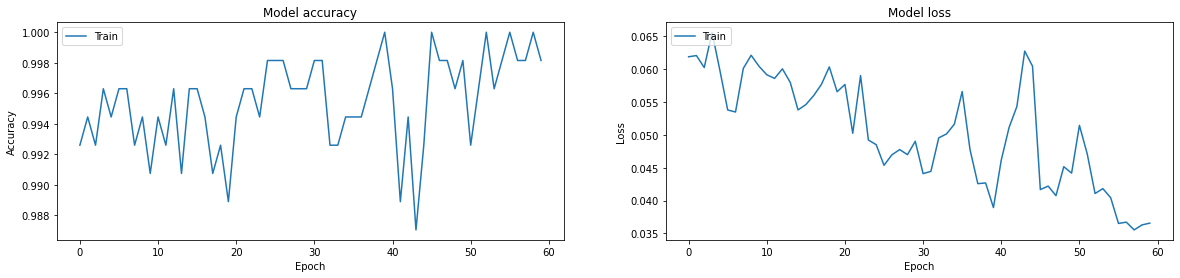

In [58]:
fig = plt.figure(figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train"], loc='upper left')
plt.show()

In [59]:
evaluation = Final.evaluate(x_test, y_test)
print ("\nTest Accuracy = " + str(evaluation[1]))
print ("Loss = " + str(evaluation[0]))

5/5 [==============================] - 0s 18ms/step - loss: 0.0658 - accuracy: 0.9800

Test Accuracy = 0.9800000190734863
Loss = 0.06581087410449982


### 5. Conclusion
 <a id='conc'></a>

* In the comparison of SGD, RMSprop and Adam Optimizers, Adam got highest accuracy.
* We got the best accuracy with Epoch 60 and Batch size 150. 



